In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

In [ ]:
# Mount your Google Drive to access your files

# Define the path to your zipped dataset file on Google Drive
zip_file_path = '/content/drive/MyDrive/chicken.zip'

# Define the destination directory where you want to unzip the files
destination_path = '/content/unzipped_data'

# Create the destination directory if it doesn't exist
!mkdir -p {destination_path}

# Unzip the file using the `unzip` command
# The -q flag ensures a quiet output
!unzip -q {zip_file_path} -d {destination_path}

print(f"Dataset unzipped to: {destination_path}")

Dataset unzipped to: /content/unzipped_data


In [ ]:
!pip install pycocotools

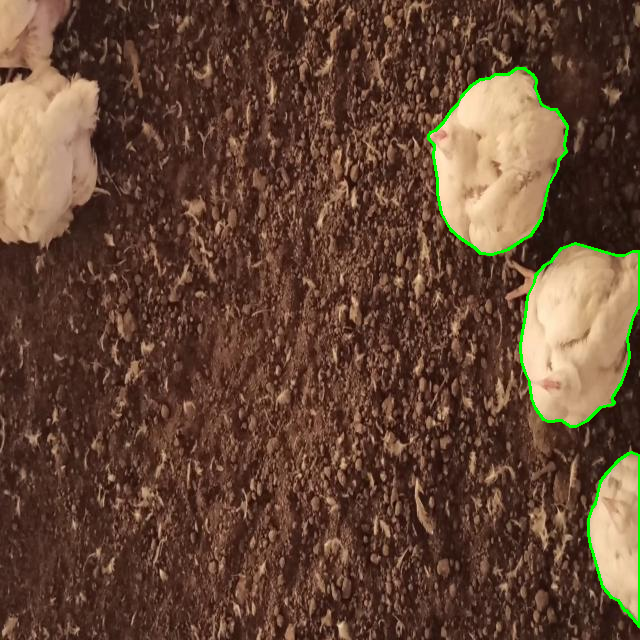

Showing image: 000000001161_jpg.rf.04c9064cf01e225c61dc5d8c10e6c5d8.jpg


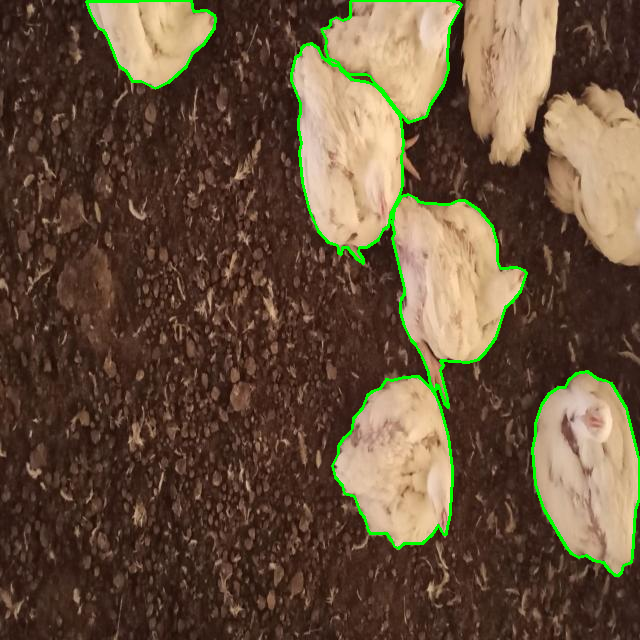

Showing image: 000000000189_jpg.rf.31773121a0f930ac3f30683bf5f3ec08.jpg


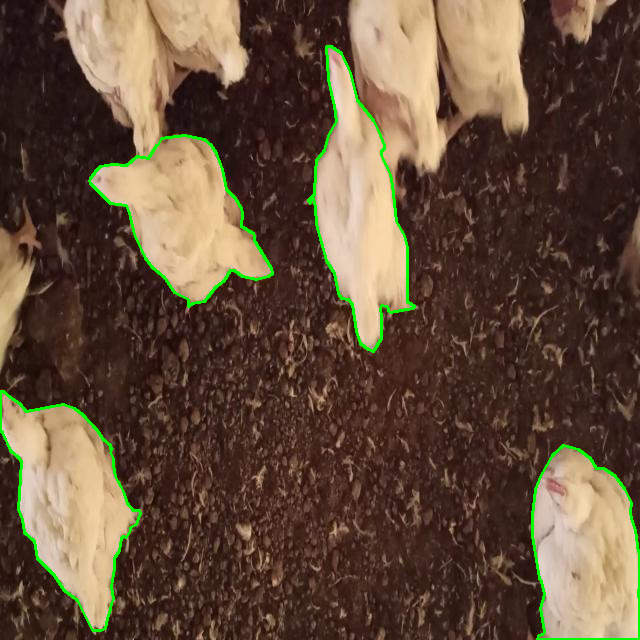

Showing image: 000000000759_jpg.rf.3183dcdb5de7efec8f583a21aff5f096.jpg


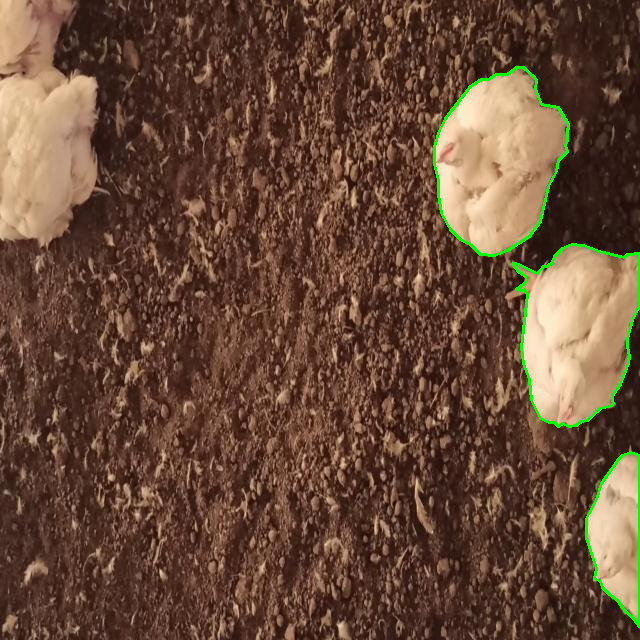

Showing image: 000000001199_jpg.rf.a64c95de2f92473ab8ae97dd9fa5e003.jpg


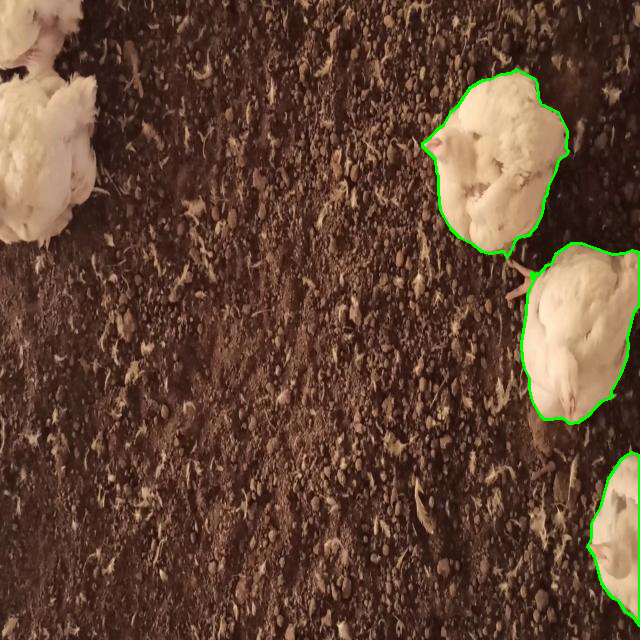

Showing image: 000000001122_jpg.rf.06b9d4d1bd57edf257ba807a497f1f16.jpg


In [ ]:
import os
import cv2
import numpy as np
import random

# Base path to your dataset
dataset_root = '/content/unzipped_data/'
split = 'train' # You can change this to 'valid' or 'test'

images_dir = os.path.join(dataset_root, split, 'images')
labels_dir = os.path.join(dataset_root, split, 'labels')

# Get a list of all image and label files
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

# Randomly select a few images to display
num_to_display = 5
selected_images = random.sample(image_files, min(num_to_display, len(image_files)))

for img_name in selected_images:
    # Construct the image and label paths
    img_path = os.path.join(images_dir, img_name)
    label_name = os.path.splitext(img_name)[0] + '.txt'
    label_path = os.path.join(labels_dir, label_name)

    # Read the image
    image = cv2.imread(img_path)
    h, w, _ = image.shape

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

            # Loop through each segmentation mask in the label file
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 1:
                    class_id = int(parts[0])
                    # Get the normalized segmentation coordinates
                    coords = np.array([float(p) for p in parts[1:]]).reshape(-1, 2)

                    # Denormalize the coordinates
                    coords[:, 0] = coords[:, 0] * w
                    coords[:, 1] = coords[:, 1] * h

                    # Convert to integer points and draw the polygon
                    pts = np.int32([coords])
                    cv2.polylines(image, pts, isClosed=True, color=(0, 255, 0), thickness=2)

    # Display the image with the masks
    # Use cv2_imshow for displaying images in Colab
    from google.colab.patches import cv2_imshow
    cv2_imshow(image)
    print(f"Showing image: {img_name}")

In [ ]:
import os
from ultralytics import YOLO
from google.colab import drive

drive.mount('/content/drive')

project_dir = '/content/drive/MyDrive/chickenCountingInfo'
yaml_file_path = '/content/unzipped_data/data.yaml'

model = YOLO('yolov8s-seg.pt')

results = model.train(
    data=yaml_file_path,
    epochs=100,
    imgsz=640,
    batch=16,
    project=project_dir,
    name='chicken_counting_final_run',
    patience=50
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/unzipped_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=

#Results of this running is in drive in chickenCountingInfo, chicken_counting_final_run

In [ ]:
import os
from ultralytics import YOLO

# Path to the directory where your training results are saved on Google Drive
training_run_path = '/content/drive/MyDrive/chickenCountingInfo/chicken_counting_final_run4'

# Load the best-performing model (best.pt) from your training run
model = YOLO(os.path.join(training_run_path, 'weights', 'best.pt'))

# Path to the test images folder
test_images_folder = '/content/unzipped_data/test/images/'

# Run inference with corrected parameters
# The 'project' parameter saves the output directly to Google Drive
results = model.predict(
    source=test_images_folder,
    project='/content/drive/MyDrive/chickenCountingInfo/chicken_counting_final_run4/predictions',  # Save to this project folder
    name='new1',  # New subfolder name for a clean run
    save=True,          # Save the output images
    show_boxes=False,   # Disable bounding boxes
    show_labels=True,   # Show labels (e.g., "chicken")
    show_conf=True      # Show confidence scores along with the labels
)


image 1/162 /content/unzipped_data/test/images/000000000010_jpg.rf.614a18b8c9af51d18a045624b056495e.jpg: 640x640 5 chickens, 20.8ms
image 2/162 /content/unzipped_data/test/images/000000000014_jpg.rf.17c342b7ebb29485e97020aea870eaa2.jpg: 640x640 6 chickens, 20.9ms
image 3/162 /content/unzipped_data/test/images/000000000018_jpg.rf.48cbc904f3f968230adf1edea8140d39.jpg: 640x640 9 chickens, 20.9ms
image 4/162 /content/unzipped_data/test/images/000000000019_jpg.rf.1d1e360653590824ec3cbda3a65ab402.jpg: 640x640 8 chickens, 20.9ms
image 5/162 /content/unzipped_data/test/images/000000000033_jpg.rf.feaee20c87ce70ed6f4e3b8d06f35741.jpg: 640x640 10 chickens, 17.4ms
image 6/162 /content/unzipped_data/test/images/000000000040_jpg.rf.583fa89411818770ae9f9bb332420f7f.jpg: 640x640 10 chickens, 15.1ms
image 7/162 /content/unzipped_data/test/images/000000000054_jpg.rf.21dfdb7d816d2ad0e325dcc4b7d43fa6.jpg: 640x640 10 chickens, 16.3ms
image 8/162 /content/unzipped_data/test/images/000000000056_jpg.rf.7298a

In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# مسیر مدل
training_run_path = '/content/drive/MyDrive/chickenCountingInfo/chicken_counting_final_run4'
model = YOLO(os.path.join(training_run_path, 'weights', 'best.pt'))

# پوشه تصاویر تست
test_images_dir = '/content/unzipped_data/test/images'
# پوشه خروجی
output_dir = '/content/drive/MyDrive/chickenCountingInfo/chicken_counting_final_run4/output_filtered_masks0.89'
os.makedirs(output_dir, exist_ok=True)

# گرفتن لیست تصاویر
image_files = [f for f in os.listdir(test_images_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

for img_file in image_files:
    img_path = os.path.join(test_images_dir, img_file)

    # پیش‌بینی
    results = model.predict(
        source=img_path,
        save=False,
        show=False,
        show_boxes=False,   # ❌ باکس‌ها نمایش داده نشن
        show_labels=True,   # ✅ برچسب‌ها (اسم کلاس + conf) بمونن
        show_conf=True
    )

    if results:
        res = results[0]

        # فیلتر کردن prediction ها با احتمال بالای 0.85
        mask = res.boxes.conf > 0.89
        res.boxes = res.boxes[mask]
        res.masks = res.masks[mask] if res.masks is not None else None

        # رسم فقط ماسک + لیبل (بدون باکس‌ها چون بالا غیرفعال کردیم)
        result_image = res.plot()

        # ذخیره تصویر خروجی
        out_path = os.path.join(output_dir, img_file)
        cv2.imwrite(out_path, result_image)

print(f"✅ همه تصاویر پردازش و در '{output_dir}' ذخیره شدند.")



image 1/1 /content/unzipped_data/test/images/000000000775_jpg.rf.d8edc822c3fbcc687206ee4a3e92d22a.jpg: 640x640 3 chickens, 20.8ms
Speed: 1.9ms preprocess, 20.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/unzipped_data/test/images/000000000188_jpg.rf.e82a7f3e7bc5f0415980e2dd0382c447.jpg: 640x640 6 chickens, 20.8ms
Speed: 1.9ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/unzipped_data/test/images/000000001273_jpg.rf.ad3e58f10c2e35565b7a7a153789b5f1.jpg: 640x640 8 chickens, 20.8ms
Speed: 1.4ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/unzipped_data/test/images/000000000787_jpg.rf.c97ac285c62426b84943d5a6ce3e6332.jpg: 640x640 2 chickens, 20.8ms
Speed: 1.4ms preprocess, 20.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/unzipped_data/test/images/000000001320_jpg.rf.599863b69cd69463f1948d

##Evaluating the model on test set(in a new session in google colab)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.8 MB/s eta 0:00:00


In [ ]:
import json
import os
import shutil

def convert_coco_to_yolo_seg(json_file_path, base_dir):
    """
    Converts COCO JSON segmentation annotations to YOLO format
    and organizes files into 'images' and 'labels' subdirectories.
    """
    if not os.path.exists(json_file_path):
        print(f"Skipping {base_dir}: {json_file_path} not found.")
        return

    print(f"Processing {base_dir}...")

    # Define paths
    images_source = os.path.join(base_dir, 'images')
    labels_dir = os.path.join(base_dir, 'labels')
    os.makedirs(labels_dir, exist_ok=True)

    with open(json_file_path, 'r') as f:
        data = json.load(f)

    img_id_to_info = {img['id']: {'filename': img['file_name'], 'width': img['width'], 'height': img['height']} for img in data['images']}

    # Process annotations and create YOLO labels
    for ann in data['annotations']:
        img_info = img_id_to_info.get(ann['image_id'])
        if not img_info or 'segmentation' not in ann or not ann['segmentation']:
            continue

        category_id = ann['category_id'] - 1  # YOLO is 0-indexed
        segmentation = ann['segmentation'][0]

        img_width, img_height = img_info['width'], img_info['height']

        normalized_coords = []
        for i in range(0, len(segmentation), 2):
            x = segmentation[i] / img_width
            y = segmentation[i+1] / img_height
            normalized_coords.append(f"{x:.6f} {y:.6f}")

        label_filename = os.path.splitext(img_info['filename'])[0] + '.txt'
        label_path = os.path.join(labels_dir, label_filename)

        with open(label_path, 'a') as label_file:
            label_file.write(f"{category_id} {' '.join(normalized_coords)}\n")

    # Move images to the correct location
    if not os.path.exists(images_source):
        os.makedirs(images_source)
        for img_info in img_id_to_info.values():
            old_path = os.path.join(base_dir, img_info['filename'])
            if os.path.exists(old_path):
                shutil.move(old_path, os.path.join(images_source, img_info['filename']))

    print(f"Conversion and organization complete for {base_dir}.")

# --- Run the conversion for all splits ---
dataset_root = '/content/unzipped_data/'

for split in ['train', 'valid', 'test']:
    split_path = os.path.join(dataset_root, split)
    json_path = os.path.join(split_path, '_annotations.coco.json')
    convert_coco_to_yolo_seg(json_path, split_path)

print("\nAll conversions complete.")

Processing /content/unzipped_data/train...
Conversion and organization complete for /content/unzipped_data/train.
Processing /content/unzipped_data/valid...
Conversion and organization complete for /content/unzipped_data/valid.
Processing /content/unzipped_data/test...
Conversion and organization complete for /content/unzipped_data/test.

All conversions complete.


In [ ]:
import os

dataset_path = '/content/unzipped_data/'

yaml_content = f"""
# Path to the dataset root folder
path: {dataset_path}

# Training and validation data paths (relative to the 'path' key)
train: train/images
val: valid/images

# Number of classes and their names
names: ['chicken']
nc: 1
"""

yaml_file_path = os.path.join(dataset_path, 'data.yaml')

with open(yaml_file_path, 'w') as f:
    f.write(yaml_content)

print(f"data.yaml file created at {yaml_file_path}")

data.yaml file created at /content/unzipped_data/data.yaml


In [ ]:
import os
from ultralytics import YOLO

# Path to the directory where your trained model is saved on Google Drive
training_run_path = '/content/drive/MyDrive/chickenCountingInfo/chicken_counting_final_run4'

# Load the best-performing model (best.pt)
model = YOLO(os.path.join(training_run_path, 'weights', 'best.pt'))

# Path to your data.yaml file, which contains the test data path
yaml_file_path = '/content/unzipped_data/data.yaml'

# Check if the YAML file path is valid
if not os.path.exists(yaml_file_path):
    print(f"Error: data.yaml file not found at {yaml_file_path}")
else:
    print(f"data.yaml file found at {yaml_file_path}. Proceeding with evaluation.")

# Evaluate the model on the test dataset
# The 'split' parameter tells YOLO to use the test set from data.yaml
results = model.val(
    data=yaml_file_path,  # Ensure this variable is correctly passed
    split='test',
    imgsz=640,
    batch=16,
    plots=True,
    project='/content/drive/MyDrive/chickenCountingInfo/predictions',
    name='test_evaluation_run'
)

data.yaml file found at /content/unzipped_data/data.yaml. Proceeding with evaluation.
Ultralytics 8.3.200 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1606.9±418.5 MB/s, size: 69.0 KB)
val: Scanning /content/unzipped_data/test/labels... 162 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 162/162 1.1Kit/s 0.1s
val: New cache created: /content/unzipped_data/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 1.5it/s 7.5s
                   all        162        845      0.972      0.976       0.98      0.961      0.972      0.976       0.98      0.969
Speed: 1.7ms preprocess, 13.0ms inference, 0.1ms loss, 7.5ms postprocess per image
Results saved to /content/drive/MyDrive/chickenCountingInfo/predictions/test_

In [ ]:
!ls -R /content/drive/MyDrive/chickenCountingInfo/predictions/test_evaluation_run

/content/drive/MyDrive/chickenCountingInfo/predictions/test_evaluation_run:
BoxF1_curve.png			 MaskF1_curve.png	val_batch1_labels.jpg
BoxP_curve.png			 MaskP_curve.png	val_batch1_pred.jpg
BoxPR_curve.png			 MaskPR_curve.png	val_batch2_labels.jpg
BoxR_curve.png			 MaskR_curve.png	val_batch2_pred.jpg
confusion_matrix_normalized.png  val_batch0_labels.jpg
confusion_matrix.png		 val_batch0_pred.jpg
